**Task 7: Support Vector Machines (SVM)**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# load data set
df = pd.read_csv("/content/breast-cancer.csv")

In [3]:
# Drop ID column
df = df.drop(columns=['id'])

In [4]:
# Encode diagnosis column: M=1, B=0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
# Split features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [6]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)print("Classification Report:\n", classification_report(y_test, y_pred_linear))


In [8]:
# Step 2: Linear SVM
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [9]:
# Predict
y_pred_linear = linear_svm.predict(X_test)




**Evaluation**

In [11]:
# Evaluation
print("🔹 Linear SVM Results:")


🔹 Linear SVM Results:


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred_linear))

Accuracy: 0.956140350877193


In [13]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

Confusion Matrix:
 [[68  3]
 [ 2 41]]


In [14]:
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
# Step 3: Non-linear SVM (RBF)

rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train)

SVC(random_state=42)

In [16]:
# Predict
y_pred_rbf = rbf_svm.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))

Accuracy: 0.9736842105263158


In [18]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

Confusion Matrix:
 [[70  1]
 [ 2 41]]


In [19]:
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [20]:
# Step 4: Visualize Decision Boundary (2D via PCA)
# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [21]:
# Train RBF SVM on 2D data for visualization
svm_vis = SVC(kernel='rbf')
svm_vis.fit(X_pca, y)

SVC()

In [22]:
# Create meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

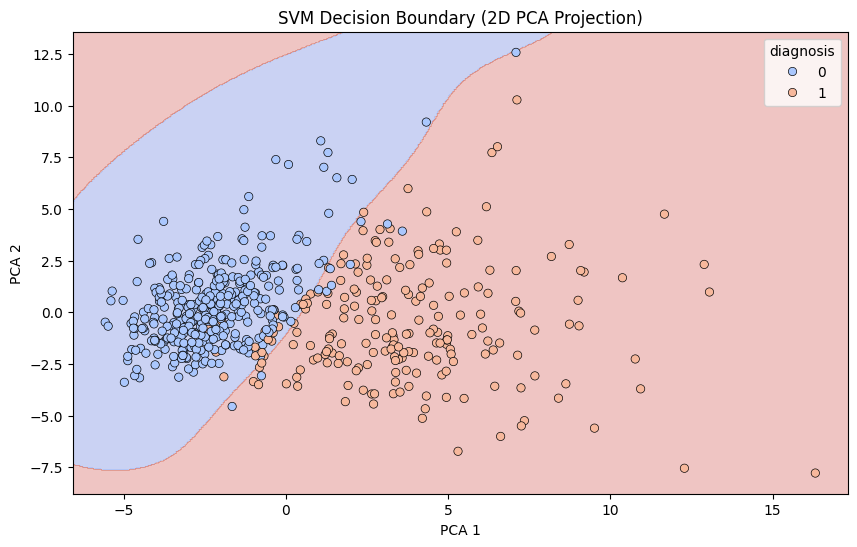

In [23]:
# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.title('SVM Decision Boundary (2D PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV


In [25]:
# Define parameter grid for RBF SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [28]:
# Grid search with 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=1)

In [29]:
# Best parameters
print("🔍 Best Parameters:", grid.best_params_)

🔍 Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [30]:
# Predict with best estimator
best_rbf_svm = grid.best_estimator_
y_pred_best = best_rbf_svm.predict(X_test)

In [31]:
# Evaluation
print("✅ Tuned RBF SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

✅ Tuned RBF SVM Results:
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[71  0]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
# Linear SVM Cross-Validation
linear_svm = SVC(kernel='linear', C=1, random_state=42)
cv_scores_linear = cross_val_score(linear_svm, X_scaled, y, cv=5)

In [34]:
print("🔹 Linear SVM Cross-Validation Scores:", cv_scores_linear)
print("🔹 Mean Accuracy (Linear):", np.mean(cv_scores_linear))

🔹 Linear SVM Cross-Validation Scores: [0.95614035 0.98245614 0.96491228 0.96491228 0.98230088]
🔹 Mean Accuracy (Linear): 0.9701443875174661


In [35]:
# RBF SVM Cross-Validation
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
cv_scores_rbf = cross_val_score(rbf_svm, X_scaled, y, cv=5)

print("\n🔹 RBF SVM Cross-Validation Scores:", cv_scores_rbf)
print("🔹 Mean Accuracy (RBF):", np.mean(cv_scores_rbf))


🔹 RBF SVM Cross-Validation Scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
🔹 Mean Accuracy (RBF): 0.9736376339077782
